## TASK 1 - Prediction using Supervised ML

 To Predict the percentage of marks of the students based on the number of hours they studied

## Author - Johanan Finnu Talari

In [5]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [7]:
# Reading the Data 
data = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
# check if there are any null values in the data
data.isnull==True

False

#### there is no null value in the dataset so,we can now visualize our data as we need.


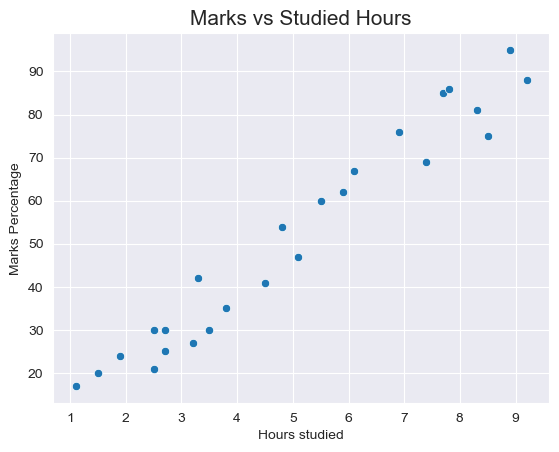

In [17]:
sns.set_style('darkgrid')
sns.scatterplot(y=data['Scores'],x=data['Hours'])
plt.title('Marks vs Studied Hours',size=15)
plt.xlabel('Hours studied',size=10)
plt.ylabel('Marks Percentage',size=10)
plt.show()

#### From the above scatter plot there looks to be a correlation between the 'Marks Percentage' and 'Hours studied', Lets plot a regression line to confirm the correlation.

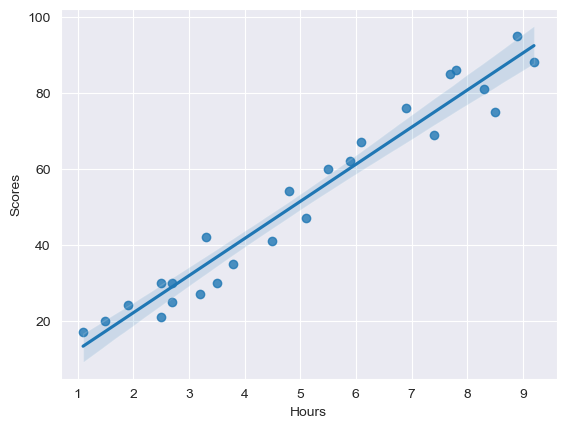

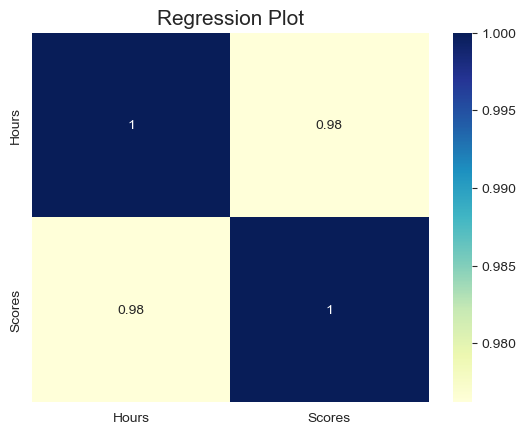

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [26]:
sns.regplot(x=data['Hours'],y=data['Scores'])
plt.show()
plt.title('Regression Plot',size=15)
plt.xlabel('Hours Studies',size=10)
plt.ylabel('Marks Percentage',size=10)
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()
print(data.corr())

#### It is confirmed that the variables are positively correlated.

## Training the Model

### 1) Splitting the data

In [27]:
# Defining X and Y from the data
X=data.iloc[:,:-1].values
Y=data.iloc[:,1].values

#Splitting tha data into two
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state = 0)


### 2) Fitting the Data into the model

In [28]:
rgrsn=LinearRegression()
rgrsn.fit(train_X,train_Y)
print("!!! MODEL TRAINED !!!")

!!! MODEL TRAINED !!!


## Predicting the Percentage of Marks

In [29]:
pred_Y=rgrsn.predict(val_X)
pred = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_Y]})
pred


,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## Comparing the Predicted Marks with the Actual Marks

In [30]:
compare_scores = pd.DataFrame({'Actual Marks': val_Y, 'Predicted Marks': pred_Y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Visually Comparing the Predicted Marks with the Actual Marks

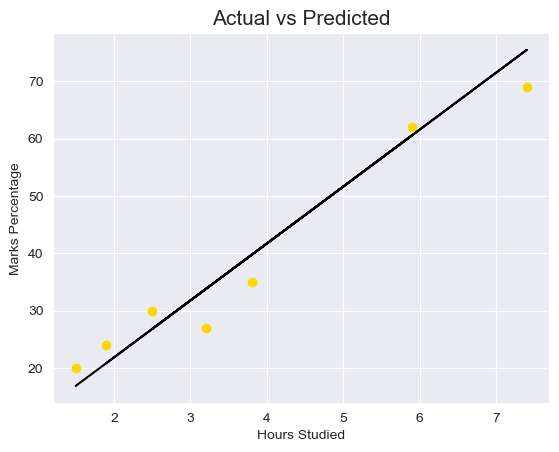

In [34]:
plt.scatter(x=val_X, y=val_Y, color='gold')
plt.plot(val_X, pred_Y, color='black')
plt.title('Actual vs Predicted', size=15)
plt.xlabel('Hours Studied', size=10)
plt.ylabel('Marks Percentage', size=10)
plt.show()


## Evaluating the Model

In [35]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_Y,pred_Y))


Mean absolute error:  4.130879918502482


### Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.



## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [38]:
hours = [9.25]
answer = rgrsn.predict([hours])
print("Score = {}".format(round(answer[0],5)))

Score = 93.89273


### According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.

